# ESPM 157 - Intro to Spatial Data

<https://espm-157.carlboettiger.info/spatial-1>

Install dependencies:

```bash
micromamba install geopandas ibis-duckdb
```

In [1]:
import ibis

con = ibis.duckdb.connect()

In [2]:
redlines = con.read_geo("/vsicurl/https://dsl.richmond.edu/panorama/redlining/static/mappinginequality.gpkg")

In [3]:
# First 10 distinct cities
redlines.select(redlines.city).distinct().head(10).execute()

,city
0,Denver
1,Miami
2,St. Petersburg
3,Waterloo
4,Peoria
5,South Bend
6,Junction City
7,Belmont
8,Fall River
9,Holyoke Chicopee


In [4]:
city = redlines.filter(redlines.city == "New Haven")

<Axes: >

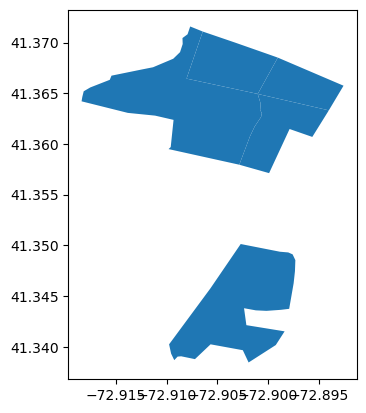

In [5]:
city_gdf = city.head().execute()
city_gdf.plot()

## OK, but what about spatial context?

I want to explore this data more interactively.

In [6]:
# from jupytergis_lab import GISDocument

# doc = GISDocument("./debug.jGIS")
# doc

In [7]:
# city_gdf.to_file("new_haven.json")

In [9]:
from jupytergis_lab.notebook.geo_debug import geo_debug


geo_debug("new_haven.json")